# **Gold Price Prediction (Regression)**

* Dataset link: [https://www.kaggle.com/datasets/franciscogcc/financial-data/data?select=financial_regression.csv](https://www.kaggle.com/datasets/franciscogcc/financial-data/data?select=financial_regression.csv)

* Dataset Description:

    | **Column**            | **Description**                                                                 |
    | --------------------- | ------------------------------------------------------------------------------- |
    | **S\&P 500**          | SPDR S\&P 500 ETF Trust — a benchmark index representing the top 500 US stocks. |
    | **Nasdaq 100**        | Invesco QQQ ETF — tracks the Nasdaq-100 Index of leading tech-heavy stocks.     |
    | **US Interest Rates** | Monthly federal interest rates set by the U.S. Federal Reserve.                 |
    | **CPI**               | Consumer Price Index — measures inflation via average change in prices.         |
    | **USD / CHF**         | Forex rate between US Dollar and Swiss Franc.                                   |
    | **EUR / USD**         | Forex rate between Euro and US Dollar.                                          |
    | **GDP**               | Gross Domestic Product — recorded every three months (trimonthly).              |
    | **Silver**            | abrdn Physical Silver Shares ETF — price of silver-based investment.            |
    | **Oil**               | USO ETF — tracks the price of U.S. crude oil.                                   |
    | **Platinum**          | abrdn Physical Platinum Shares ETF — price of platinum-based asset.             |
    | **Palladium**         | abrdn Physical Palladium Shares ETF — price of palladium-based asset.           |
    | **Gold**              | SPDR Gold Trust ETF — **target variable** representing the gold price.          |

### Import neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Data Collection

In [ ]:
df = pd.read_csv(r'Dataset\Gold_Price.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


# # Data Preprocessing

In [4]:
df.isna().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [ ]:
df = df.drop(['GDP','CPI','us_rates_%'], axis = 1)

In [6]:
df = df.dropna()

In [7]:
df.isna().sum().sum()

0

In [8]:
df.head().T

,0,1,3,4,5
date,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21
sp500 open,114.49,114.73,113.62,114.28,113.92
sp500 high,115.14,114.84,115.13,114.45,114.27
sp500 low,114.42,113.2,113.59,112.98,111.56
sp500 close,114.93,113.64,115.06,113.89,111.7
sp500 volume,115646960.0,212252769.0,138671890.0,216330645.0,344747028.0
sp500 high-low,0.72,1.64,1.54,1.47,2.71
nasdaq open,46.26,46.46,45.96,46.27,46.06
nasdaq high,46.52,46.55,46.64,46.604,46.35
nasdaq low,46.22,45.65,45.95,45.43,45.3


In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [10]:
df = df.drop('date', axis=1)

In [11]:
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume,year,month,day
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0,2010,1,14
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0,2010,1,15
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0,2010,1,19
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0,2010,1,20
5,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,...,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0,2010,1,21


In [12]:
x = df.drop('gold close',axis =1)
y= df['gold close']
x.head().T

,0,1,3,4,5
sp500 open,1.144900e+02,1.147300e+02,1.136200e+02,1.142800e+02,1.139200e+02
sp500 high,1.151400e+02,1.148400e+02,1.151300e+02,1.144500e+02,1.142700e+02
sp500 low,1.144200e+02,1.132000e+02,1.135900e+02,1.129800e+02,1.115600e+02
sp500 close,1.149300e+02,1.136400e+02,1.150600e+02,1.138900e+02,1.117000e+02
sp500 volume,1.156470e+08,2.122528e+08,1.386719e+08,2.163306e+08,3.447470e+08
sp500 high-low,7.200000e-01,1.640000e+00,1.540000e+00,1.470000e+00,2.710000e+00
nasdaq open,4.626000e+01,4.646000e+01,4.596000e+01,4.627000e+01,4.606000e+01
nasdaq high,4.652000e+01,4.655000e+01,4.664000e+01,4.660400e+01,4.635000e+01
nasdaq low,4.622000e+01,4.565000e+01,4.595000e+01,4.543000e+01,4.530000e+01
nasdaq close,4.639000e+01,4.585000e+01,4.659000e+01,4.592000e+01,4.549000e+01


# # Data Splitting

In [13]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state =42)

# # Model Building

In [ ]:
model = LinearRegression()

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.20
MSE: 0.08
RMSE: 0.27
R² Score: 1.00


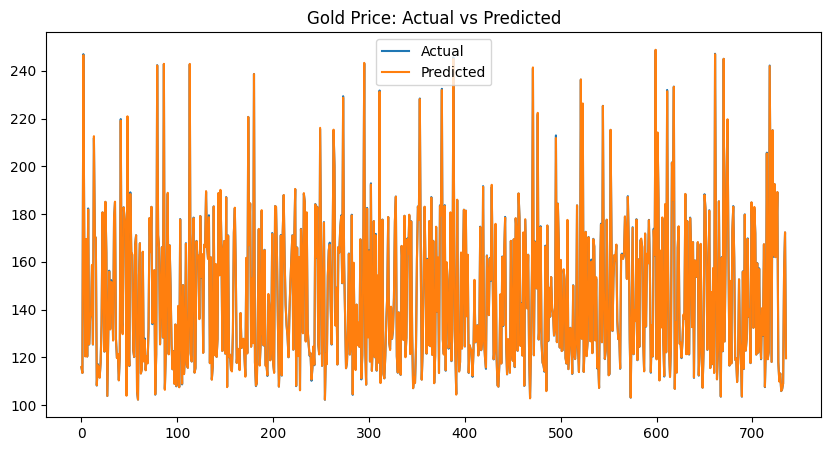

In [16]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Gold Price: Actual vs Predicted')
plt.show()